In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import ipywidgets as widgets

from ipywidgets import interactive
from IPython.display import display
from itertools import permutations

%matplotlib widget

ENGAGE_RANDOMIZER = False
GRID_MIN = -2.5
GRID_MAX = 2.5

def find_roots_cycling(poly):
    assert len(poly) == 3
    b, c = poly[1:]
    d = np.sqrt(b*b - 4*c)
    return (-b - d) / 2, (-b + d) / 2

def find_roots_converging(poly):
    # This variation is cool too, points convert to 1 and -2.
    return tuple(reversed(find_roots_cycling(poly)))

def find_coefs(poly):
    r1, r2 = poly[1:]
    return r1 * r2, -(r1 + r2)

# Sanity Check: operations are the inverse of each other.
#test1 = find_roots_cycling([1.0 + 0.0j] * 3)
#test2 = find_roots_cycling([1.0 + 0.0j] * 3)
#print(find_coefs([1.0 + 0.0j] + list(test1)))
#print(find_coefs([1.0 + 0.0j] + list(test2)))

def generateRootCloud(initial_poly, MAX_POINTS = 100000, find_roots = find_roots_cycling):
    queue = [initial_poly]
    points = []
    while len(points) < MAX_POINTS:
        if ENGAGE_RANDOMIZER and len(points) > 1:
            i = random.randint(0, len(points) - 1)
            points[i], points[0] = points[0], points[i]
        poly = queue[0]
        queue[:] = queue[1:]
        roots = find_roots(poly)
        points.extend(roots)
        for perm in permutations(roots):
            next_poly = np.concatenate(([1.0 + 0.0j], perm))
            queue.append(next_poly)
    return points

def plotPoints(points):
    xs = [np.real(x) for x in points]
    ys = [np.imag(x) for x in points]
    plt.scatter(xs, ys, marker='.', s=1)

def rootIterate(initial_poly, MAX_POINTS = 10000, find_roots = find_roots_cycling):
    queue = [(initial_poly, 0)]
    pointsB = []
    pointsC = []
    done = 0
    while len(pointsB) < MAX_POINTS:
        poly, generation = queue[0]
        queue[:] = queue[1:]
        b, c = roots = find_roots(poly)
        pointsB.append((b, generation))
        pointsC.append((c, generation))
        next_poly = [1.0 + 0.0j, b, c]
        queue.append((next_poly, generation + 1))
    return pointsB, pointsC

def plotBackground(points):
    xs = [np.real(x) for x in points]
    ys = [np.imag(x) for x in points]
    plt.scatter(xs, ys, marker = '.', s = 1, c = '#AAAADD')

def plotInitialPoints(br, bi, cr, ci):
    xs = [br, cr]
    ys = [bi, ci]
    plt.scatter(xs, ys, marker = 'o', c = '#EE9754')

def plotPoints(pointsB, pointsC):
    xs = [np.real(x) for (x, g) in pointsB]
    ys = [np.imag(x) for (x, g) in pointsB]
    plt.plot(xs, ys, color = '#4444AA', linewidth = 1)
    plt.scatter([xs[0]], [ys[0]], marker = 'o', c = '#4444AA')

    xs = [np.real(x) for (x, g) in pointsC]
    ys = [np.imag(x) for (x, g) in pointsC]
    plt.plot(xs, ys, color = '#AA4444', linewidth = 1)
    plt.scatter([xs[0]], [ys[0]], marker = 'o', c = '#AA4444')

def apply_line_style(line, vector):
    line.axes.annotate(
        '',
        xytext=(0, 0),
        xy=(vector[0], vector[1]),
        arrowprops=dict(color=line.get_color(), arrowstyle='simple'),
        size=10
    )

def configure_graph_grid():
    plt.axis('square')
    plt.axis((GRID_MIN, GRID_MAX, GRID_MIN, GRID_MAX))

    plt.plot([GRID_MIN, GRID_MAX], [0, 0], 'black')
    plt.plot([0, 0], [GRID_MIN, GRID_MAX], 'black')
    plt.grid()

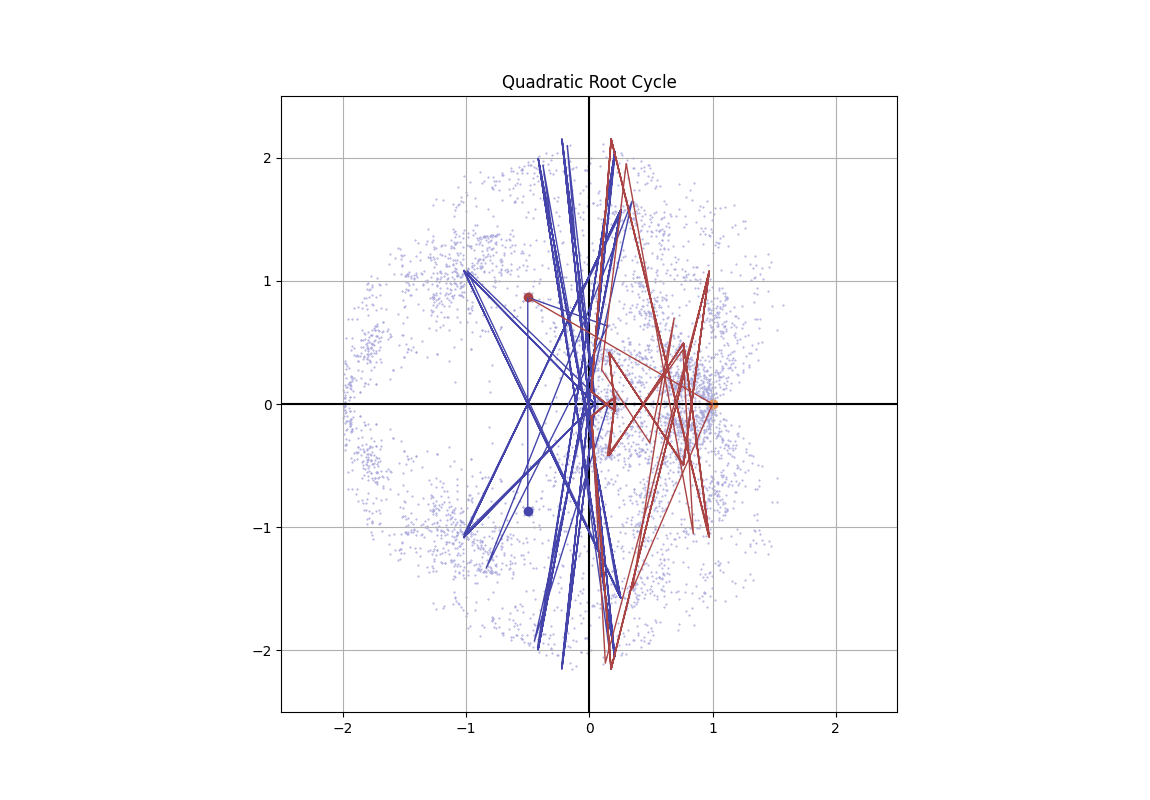

In [2]:
def run():
    br, bi, cr, ci = 1.0, 0.0, 1.0, 0.0
    poly = [1.0 + 0.0j, br + bi * 1.0j, cr + ci* 1.0j]
    pointsBackground = generateRootCloud(poly, MAX_POINTS = 5000)
    pointsB, pointsC = rootIterate(poly, MAX_POINTS = 64)

    fig = plt.figure(figsize=(11.5,8))

    configure_graph_grid()
    plotBackground(pointsBackground)
    plotPoints(pointsB, pointsC)
    plotInitialPoints(br, bi, cr, ci)

    plt.title('Quadratic Root Cycle')
    plt.draw()
run()

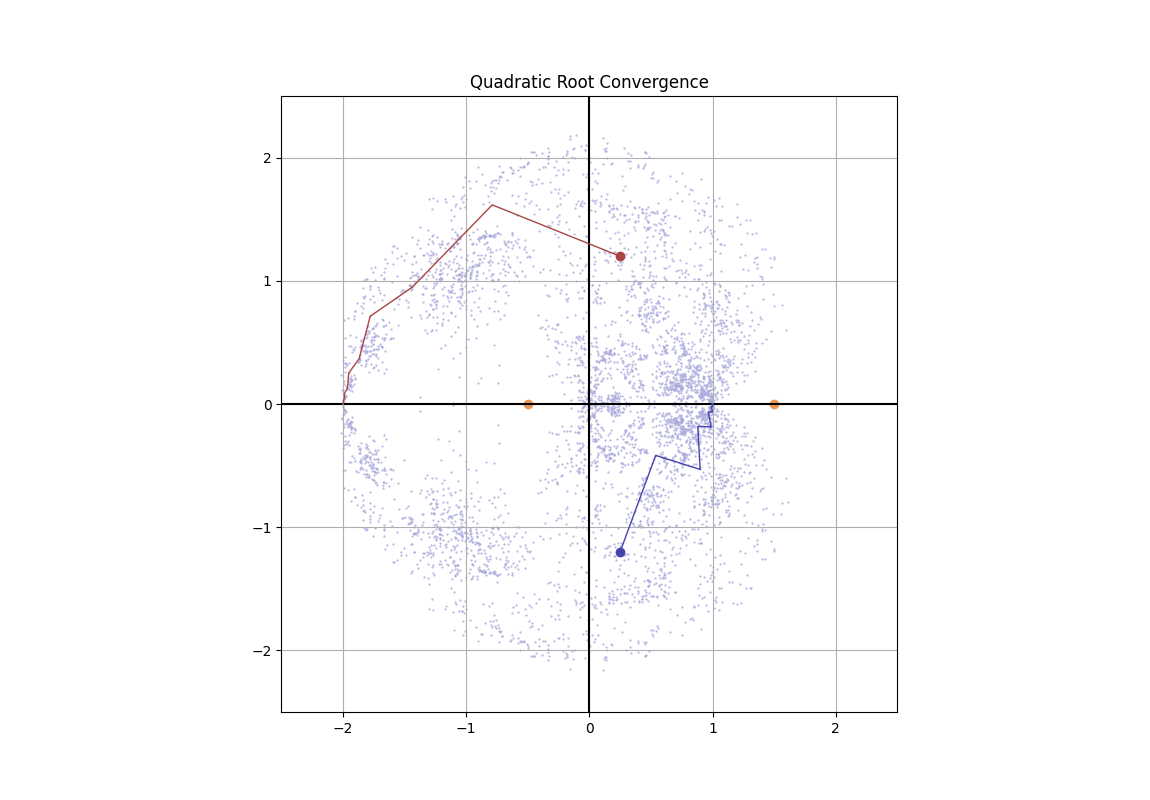

In [3]:
def run():
    br, bi, cr, ci = -0.5, 0.0, 1.5, 0.0
    poly = [1.0 + 0.0j, br + bi * 1.0j, cr + ci* 1.0j]
    pointsBackground = generateRootCloud(poly, MAX_POINTS = 5000)
    pointsB, pointsC = rootIterate(poly, MAX_POINTS = 64, find_roots = find_roots_converging)

    fig = plt.figure(figsize=(11.5,8))

    configure_graph_grid()
    plotBackground(pointsBackground)
    plotPoints(pointsB, pointsC)
    plotInitialPoints(br, bi, cr, ci)

    plt.title('Quadratic Root Convergence')
    plt.draw()
run()

interactive(children=(FloatSlider(value=-22.295394999820775, description='br', max=250.0, min=-250.0, step=0.0…

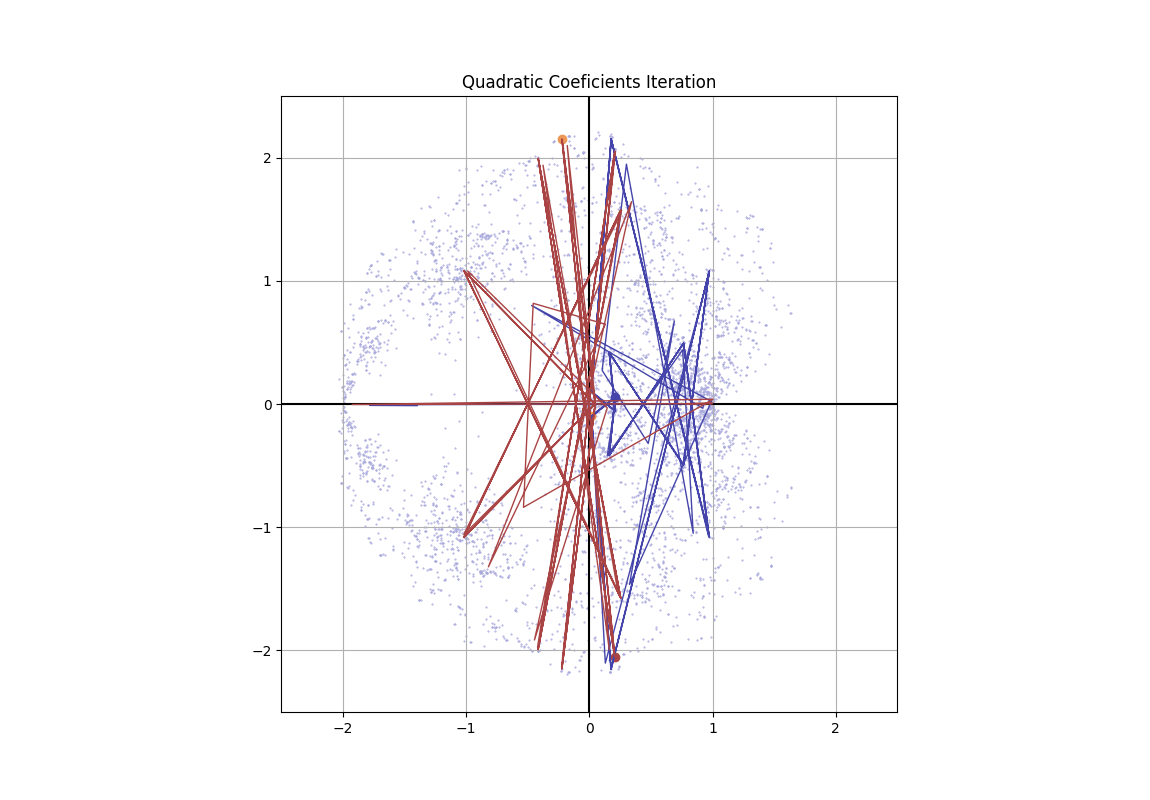

In [4]:
def run():
    def do_update(br, bi, cr, ci):
        br /= 100.0
        bi /= 100.0
        cr /= 100.0
        ci /= 100.0
        poly = [1.0 + 0.0j, br + bi * 1.0j, cr + ci* 1.0j]
        pointsBackground = generateRootCloud(poly, MAX_POINTS = 5000)
        pointsB, pointsC = rootIterate(poly, MAX_POINTS = 64, find_roots = find_coefs)
    
        fig.clf()
    
        configure_graph_grid()
        plotBackground(pointsBackground)
        plotPoints(pointsB, pointsC)
        plotInitialPoints(br, bi, cr, ci)
    
        plt.title('Quadratic Coeficients Iteration')
        plt.draw()
    
    def handle_event(br, bi, cr, ci):
        do_update(br, bi, cr, ci)
    
    def slider_config(value):
        return widgets.FloatSlider(min=GRID_MIN * 100, max=GRID_MAX * 100, step=0.01, value=value)
    
    plt.close()
    fig = plt.figure(figsize=(11.5,8))

    poly = [1.0 + 0.0j] * 3
    pointsB, pointsC = rootIterate(poly, MAX_POINTS = 64, find_roots = find_roots_cycling)
    where = -1 * random.randint(1, 12)
    magic_starts = pointsB[where][0], pointsC[where][0]
    #print(magic_starts)
    
    slider_controls = interactive(
        handle_event,
        #br=slider_config(0.25),
        #bi=slider_config(0.25),
        #cr=slider_config(0.50),
        #ci=slider_config(0.25),
        br=slider_config(np.real(magic_starts[0]) * 100),
        bi=slider_config(np.imag(magic_starts[0]) * 100),
        cr=slider_config(np.real(magic_starts[1]) * 100),
        ci=slider_config(np.imag(magic_starts[1]) * 100),
    )
    display(slider_controls)
run()